# Learning pandas

Here is one way of getting the solution. There are others, feel free to share yours.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = "https://www.gov.scot/binaries/content/documents/govscot/publications/statistics/2020/01/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/documents/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/govscot%3Adocument/SIMD%2B2020v2%2B-%2Branks.xlsx"

In [3]:
simd = pd.read_excel(url, sheet_name="SIMD 2020v2 ranks")

**Which data zone is the most deprived (lowest ranking?) Which council area is it?**

In [4]:
simd.sort_values("SIMD2020v2_Rank")

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank
4385,S01010891,Greenock Town Centre and East Central,Inverclyde,446,310,1,8.0,4.0,2,7,6080,17.0,666.0
3739,S01010245,Carntyne West and Haghill,Glasgow City,796,554,2,3.0,7.0,3,6,3352,515.0,640.0
5092,S01011598,Cliftonville,North Lanarkshire,801,603,3,22.0,3.0,40,4,3287,55.0,1079.0
5562,S01012068,Paisley Ferguslie,Renfrewshire,480,318,4,4.0,12.0,4,5,5622,376.0,514.0
3616,S01010122,North Barlanark and Easterhouse South,Glasgow City,511,373,5,17.0,15.0,9,54,5325,85.0,447.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,S01006559,Midstocket,Aberdeen City,601,404,6972,6709.0,6749.0,6845,6918,6569,4464.0,5199.0
2116,S01008622,Marchmont West,City of Edinburgh,512,406,6973,6969.0,6963.0,6917,6686,6774,5555.0,1421.0
67,S01006573,West End North,Aberdeen City,790,535,6974,6702.0,6895.0,6893,6804,5395,5882.0,6618.0
55,S01006561,Midstocket,Aberdeen City,728,443,6975,6888.0,6873.0,6714,6629,6844,3906.0,6509.0


You can read the value from the table or extract it using `iloc`, which works like `loc` but based on a position.

In [5]:
simd.sort_values("SIMD2020v2_Rank").iloc[0]["Council_area"]

'Inverclyde'

**Can you add a column with a proportion of the working age population in each data zone?**

In [6]:
simd["working_proportion"] = simd["Working_age_population"] / simd["Total_population"]

**Which council area is, on average, the least deprived based on the Income domain?**

In [7]:
simd.groupby("Council_area")["SIMD2020v2_Income_Domain_Rank"].mean().sort_values(ascending=False).head(1)

Council_area
East Renfrewshire    4852.442623
Name: SIMD2020v2_Income_Domain_Rank, dtype: float64

In [18]:
simd.groupby("Council_area")["SIMD2020v2_Income_Domain_Rank"].mean()

Council_area
Aberdeen City            4263.863958
Aberdeenshire            4800.075000
Angus                    3786.593548
Argyll and Bute          3728.028000
City of Edinburgh        4371.351759
Clackmannanshire         3077.305556
Dumfries and Galloway    3413.870647
Dundee City              2712.803191
East Ayrshire            2810.294479
East Dunbartonshire      4743.234615
East Lothian             3704.382576
East Renfrewshire        4852.442623
Falkirk                  3480.455607
Fife                     3498.852227
Glasgow City             2210.412198
Highland                 3795.360577
Inverclyde               2506.714912
Midlothian               3497.260870
Moray                    3986.936508
Na h-Eileanan an Iar     3483.236111
North Ayrshire           2580.784946
North Lanarkshire        2742.365772
Orkney Islands           4383.551724
Perth and Kinross        4287.701613
Renfrewshire             3374.646667
Scottish Borders         3801.734266
Shetland Islands         

**What is the total population of the “Glasgow City” council?**

In [8]:
simd.groupby("Council_area")["Total_population"].sum()["Glasgow City"]

621020

**Can you plot the ranking distribution in “Glasgow City”? How does it compare to the “City of Edinburgh”?**

<Axes: ylabel='Frequency'>

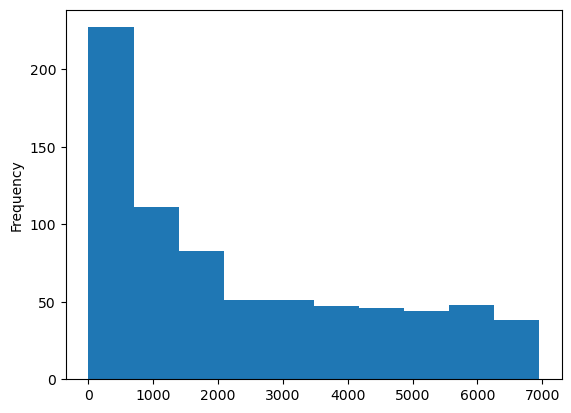

In [9]:
glasgow = simd.query("Council_area == 'Glasgow City'")
glasgow["SIMD2020v2_Rank"].plot.hist()

<Axes: ylabel='Frequency'>

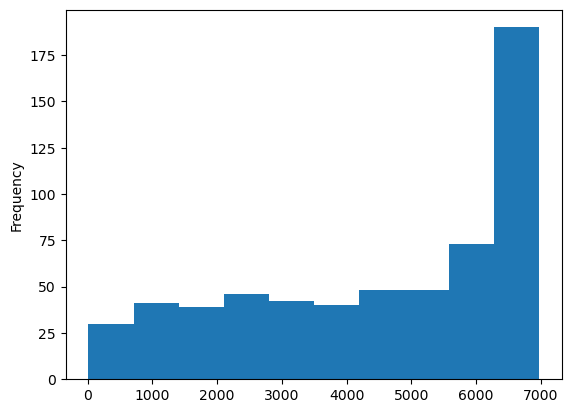

In [10]:
edinburgh = simd.query("Council_area == 'City of Edinburgh'")
edinburgh["SIMD2020v2_Rank"].plot.hist()

Or using `seaborn`.

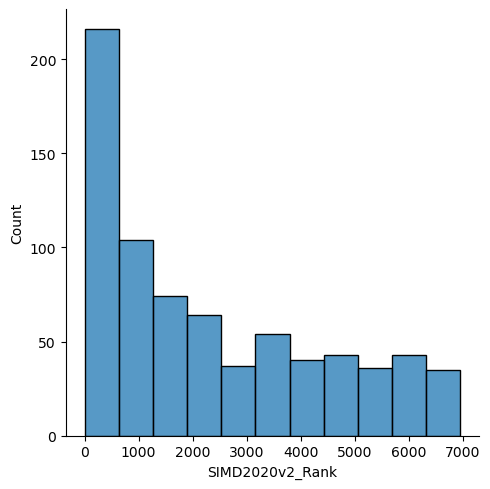

In [11]:
sns.displot(glasgow["SIMD2020v2_Rank"])

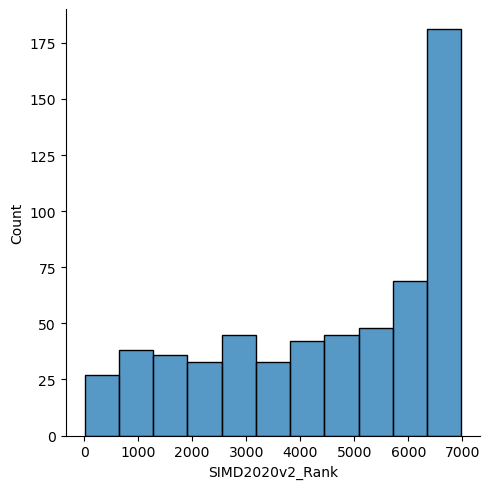

In [12]:
sns.displot(edinburgh["SIMD2020v2_Rank"])

**Can you figure out how to create a scatter plot of a relationship between the education and health domain rankings?**

<Axes: xlabel='SIMD2020_Education_Domain_Rank', ylabel='SIMD2020_Health_Domain_Rank'>

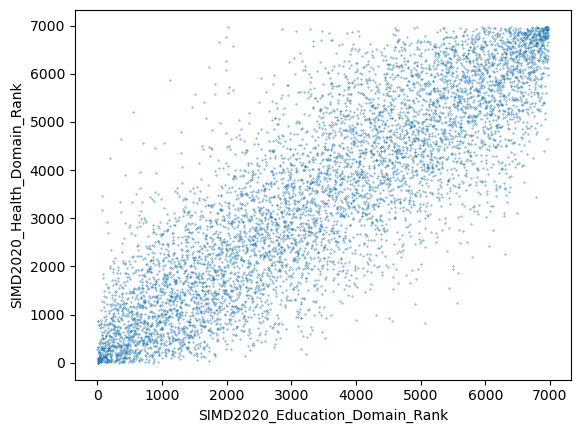

In [16]:
simd.plot.scatter("SIMD2020_Education_Domain_Rank", "SIMD2020_Health_Domain_Rank", s=.1)

Or using `seaborn`.

<Axes: xlabel='SIMD2020_Education_Domain_Rank', ylabel='SIMD2020_Health_Domain_Rank'>

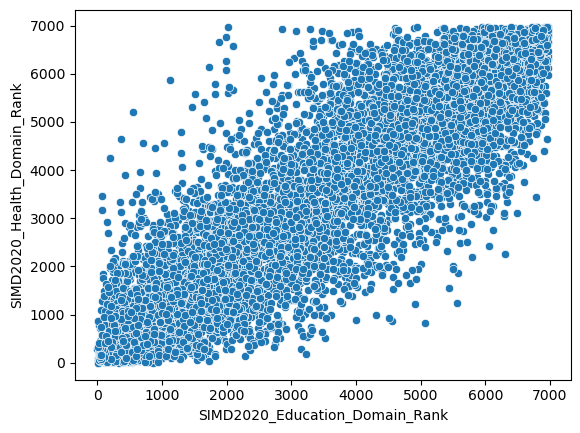

In [14]:
sns.scatterplot(x="SIMD2020_Education_Domain_Rank", y="SIMD2020_Health_Domain_Rank", data=simd)

**What else can you derive from the data?**

Plenty :).
